In [ ]:
from 3DRegionGrowing.segmentation_3D_secondversion import resample, grow
from skimage import measure
#from 3DRegionGrowing.automaticSeeding import find_seed
from preprocess import arrange_slices, normalization, get_pixels_hu #,creating_mask
#from read_files import normalization
import scipy.ndimage.interpolation as inter
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as spio
import pydicom
import time

def creating_mask(indices,slices):
    max_rows = slices.shape[1]
    max_cols = slices.shape[2]
    mask = np.ones(slices.shape)*0.2
    for s in indices:
        mask[s[0]-1,max_rows-s[1]-1,max_cols-s[2]-1]=1
    return mask 

slices_path = "G:/CTimages/"
indices_path ="G:/Plans/CT/Lungs/ok/Separated Lungs"
segmentations_results_path = "G:/Plans/CT/Lungs/segmentation_results/"
indices_folder= os.listdir(indices_path)

patient_id = "39002828" 
slices= arrange_slices(slices_path,patient_id)
normalized_volume=normalization(slices)
normalized_array = np.array(normalized_volume)
patient_id_file = "39002828 - ct_left_lung_coordinates"
opened = spio.loadmat(indices_path+'/'+patient_id_file, squeeze_me=True)["indexes"]
x_indices = [s[0] for s in opened]
y_indices = [s[2] for s in opened]
slices = arrange_slices(slices_path,patient_id)
normalized_volume=normalization(slices)
normalized_array = np.array(normalized_volume)
print(normalized_array.shape)
mask = creating_mask(opened,normalized_array)
row = normalized_array.shape[1]//2

#CONTOURS
contours = measure.find_contours(mask[:,row,:], 0.9)

fig_1 = plt.figure(figsize=(20,10))  
fig, ax = plt.subplots()

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], 'r', linewidth=2)
    
fig_1.suptitle("Mask", fontsize=16)
y = fig_1.add_subplot(1,2,1)
y.imshow(normalized_array[:,row,:], interpolation='nearest')

for n, contour in enumerate(contours):
    y.plot(contour[:, 1], contour[:, 0], 'r', linewidth=2)
    
x = fig_1.add_subplot(1,2,2)
x.imshow(normalized_array[:,row,:]*mask[:,row,:])
plt.show()


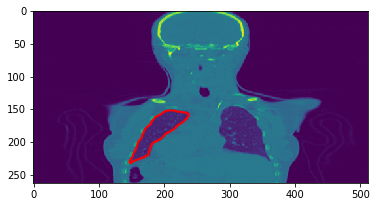

In [18]:
#Code from Amin habibi, available at https://stackoverflow.com/questions/57507234/axis-aligned-bounding-box-skimage

contours = measure.find_contours(mask[:,row,:], 0.9)

fig, ax = plt.subplots()
ax.imshow(normalized_array[:,row,:], interpolation='nearest')#, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], 'r', linewidth=2)
    
